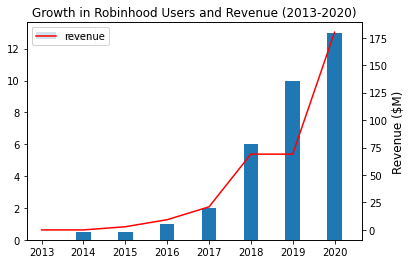

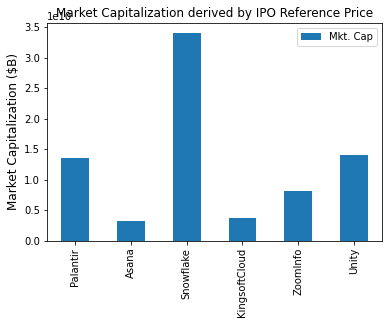

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# graph to show the growth in # retail investors, based on Robinhood statistics
width = .35 # width of a bar

m1_t = pd.DataFrame({
 'revenue' : [0,0,2.9,9.3,21,69,69,180],
 'users' : [0,0.5,0.5,1,2,6,10,13]})

m1_t[['users']].plot(kind='bar', width = width)
m1_t['revenue'].plot(color='red',secondary_y=True)

ax = plt.gca()
ax.legend()
plt.xlim([-width, len(m1_t['users'])-width])


ax.set_xticklabels(('2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'))
plt.title('Growth in Robinhood Users and Revenue (2013-2020)')
plt.xlabel('Year', fontsize=32)
plt.ylabel('Revenue ($M)', fontsize=12)

plt.show()

# graph to show the market capitalization for each stock we looked at 
width = .5 # width of a bar
m1_t = pd.DataFrame({
 'Mkt. Cap' : [13615104822,3246679245,33972040237,3706302521,8175471698,14080376308]})

m1_t[['Mkt. Cap']].plot(kind='bar', width = width)

ax = plt.gca()
ax.legend()
plt.xlim([-width, len(m1_t['Mkt. Cap'])-width])

ax.set_xticklabels(('Palantir', 'Asana', 'Snowflake', 'KingsoftCloud', 'ZoomInfo', 'Unity'))
plt.title('Market Capitalization derived by IPO Reference Price')
#plt.xlabel('Company', fontsize=12)
plt.ylabel('Market Capitalization ($B)', fontsize=12)

plt.show()


# Analyzing the Data: Weighted Sentiments vs. Time

In [2]:
from os import path
import csv
import plotly.express as px
import numpy as np
import datetime

REPO_PATH = "/Users/michellelee/Documents/GitHub/cs591_sns_ipo/sentiment_data/" # change me

# neg,neu,pos,compound,vader,txtblob,retweets,favorites,
# weighted_compound_0,score_0,weighted_compound_1,score_1,
# weighted_compound_2,score_2,weighted_compound_3,score_3

pltr_df = pd.read_csv(REPO_PATH+'PLTR_Tweets.csv') 
asan_df = pd.read_csv(REPO_PATH+'ASAN_Tweets.csv') 
snow_df = pd.read_csv(REPO_PATH+'SNOW_Tweets.csv') 
kc_df = pd.read_csv(REPO_PATH+'KC_Tweets.csv') 
u_df = pd.read_csv(REPO_PATH+'U_Tweets.csv') 
zi_df = pd.read_csv(REPO_PATH+'ZI_Tweets.csv') 

"""
score = []
# use this if we need to calculate compound (?)
for i in range(len(df['weighted_compound_0'])):
    score.append(df['weighted_compound_0'][i]*df['score_0'][i])
    bubble.append(df['retweets'][i]+df['favorites'][i])
df['score'] = score
"""

# helper function to convert string to datetime and add engagement sum as dataframe attributes
def helper(df):
    bubble = []
    dt = []
    for i in range(len(df['compound'])):
        bubble.append(df['retweets'][i]+df['favorites'][i])
        dt_s = df['created_at'][i]
        dt_o = datetime.datetime.strptime(dt_s, '%Y-%m-%d %H:%M:%S')
        dt.append(dt_o)
    df['bubble'] = bubble
    df['time'] = dt
    return df

pltr_df = helper(pltr_df)
asan_df = helper(asan_df)
snow_df = helper(snow_df)
kc_df = helper(kc_df)
u_df = helper(u_df)
zi_df = helper(zi_df)

# Palantir

In [9]:
fig = px.scatter(pltr_df, x="time", y="weighted_compound_0", trendline="lowess", size="bubble",range_y=[-1,1], 
                 title="PLTR Tweets Sentiment Analysis",
                 labels={ # replaces default labels by column name
                "time": "Timestamp",  "weighted_compound_0": "Weighted Sentiment Value"})
fig.show()

# Asana

In [4]:
fig = px.scatter(asan_df, x="time", y="weighted_compound_0", trendline="lowess", size="bubble",range_y=[-1,1], 
                 title="ASAN Tweets Sentiment Analysis",
                 labels={ # replaces default labels by column name
                "time": "Timestamp",  "weighted_compound_0": "Weighted Sentiment Value"})
fig.show()

# Snowflake

In [5]:
fig = px.scatter(snow_df, x="time", y="weighted_compound_0", trendline="lowess", size="bubble",range_y=[-1,1], 
                 title="SNOW Tweets Sentiment Analysis",
                 labels={ # replaces default labels by column name
                "time": "Timestamp",  "weighted_compound_0": "Weighted Sentiment Value"})
fig.show()

# Kingsoft Cloud

In [6]:
fig = px.scatter(kc_df, x="time", y="weighted_compound_0", trendline="lowess", size="bubble",range_y=[-1,1], 
                 title="KC Tweets Sentiment Analysis",
                 labels={ # replaces default labels by column name
                "time": "Timestamp",  "weighted_compound_0": "Weighted Sentiment Value"})
fig.show()

# Unity

In [7]:
fig = px.scatter(u_df, x="time", y="weighted_compound_0", trendline="lowess", size="bubble",range_y=[-1,1], 
                 title="U Tweets Sentiment Analysis",
                 labels={ # replaces default labels by column name
                "time": "Timestamp",  "weighted_compound_0": "Weighted Sentiment Value"})
fig.show()

# ZoomInfo

In [8]:
fig = px.scatter(zi_df, x="time", y="weighted_compound_0", trendline="lowess", size="bubble",range_y=[-1,1], 
                 title="ZI Tweets Sentiment Analysis",
                 labels={ # replaces default labels by column name
                "time": "Timestamp",  "weighted_compound_0": "Weighted Sentiment Value"})
fig.show()

# Analyzing News Data: an attempt

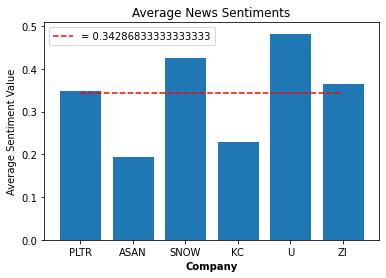

"\nbl = avg_by_source(avgs, 0) # bloomberg\nmw = avg_by_source(avgs, 1) # marketwatch\ncnbc = avg_by_source(avgs, 2) # cnbc\nyf = avg_by_source(avgs, 3) # yahoo finance\nsa = avg_by_source(avgs, 4) # seeking alpha\ny = [bl,mw,cnbc,yf,sa]\n\nr = np.arange(len(y))\nplt.bar(r, y, color='b', width=0.8, edgecolor='white')\nplt.xlabel('Source', fontweight='bold')\nplt.xticks([r for r in range(len(y))], ['Bloomberg', 'MarketWatch', 'CNBC', 'Yahoo Finance', 'Seeking Alpha'])\n\nplt.legend()\nplt.show()\n"

In [70]:
import matplotlib.pyplot as plt

width = .35 # width of a bar

pltr_news_df = pd.read_csv(REPO_PATH+'PLTR_News.csv') 
asan_news_df = pd.read_csv(REPO_PATH+'ASAN_News.csv') 
snow_news_df = pd.read_csv(REPO_PATH+'SNOW_News.csv') 
kc_news_df = pd.read_csv(REPO_PATH+'KC_News.csv') 
u_news_df = pd.read_csv(REPO_PATH+'U_News.csv') 
zi_news_df = pd.read_csv(REPO_PATH+'ZI_News.csv') 

# print(pltr_news_df)

"""
data = [pltr_news_df['compound'],
  asan_news_df['compound'],
  snow_news_df['compound'],
  kc_news_df['compound'],
  u_news_df['compound'],
  zi_news_df['compound']]

gap = .8 / len(data)
for i, row in enumerate(data):
  X = np.arange(len(row))
  plt.bar(X + i * gap, row,
    width = gap,
    color = color_list[i % len(color_list)])
plt.show()
"""
# helper to get the average of title+teaser per source
def avg(df):
    s = 0
    c = []
    for i in range(len(df['compound'])):
        s = s + float(df['compound'][i])
        if(i != 0 and i%2 == 0):
            s = s/2
            c.append(s)
            s = 0
    c.append(s)
    return c

def avg_by_source(avgs, n):
    s = 0
    for i in avgs:
        s += i[n]
    return s/5
            
pltr_avg = avg(pltr_news_df)
asan_avg = avg(asan_news_df)
snow_avg = avg(snow_news_df)
kc_avg = avg(kc_news_df)
u_avg = avg(u_news_df)
zi_avg = avg(zi_news_df)

#avgs = [pltr_avg, asan_avg, snow_avg, kc_avg, u_avg, zi_avg]
avgs = [sum(pltr_avg)/len(pltr_avg),sum(asan_avg)/len(asan_avg),
       sum(snow_avg)/len(snow_avg),sum(kc_avg)/len(kc_avg),
       sum(u_avg)/len(u_avg),sum(zi_avg)/len(zi_avg)]

all_avg = sum(avgs)/len(avgs)

r = np.arange(len(avgs))
plt.bar(r, avgs, width=0.8, edgecolor='white')
plt.plot(r, [all_avg for i in r] ,'--', color='r', label="= "+str(all_avg))

plt.xlabel('Source', fontweight='bold')
plt.xticks([r for r in range(len(avgs))], ['PLTR', 'ASAN', 'SNOW', 'KC', 'U', 'ZI'])
plt.title("Average News Sentiments")
plt.xlabel("Company")
plt.ylabel("Average Sentiment Value")


plt.legend()
plt.show()

"""
bl = avg_by_source(avgs, 0) # bloomberg
mw = avg_by_source(avgs, 1) # marketwatch
cnbc = avg_by_source(avgs, 2) # cnbc
yf = avg_by_source(avgs, 3) # yahoo finance
sa = avg_by_source(avgs, 4) # seeking alpha
y = [bl,mw,cnbc,yf,sa]

r = np.arange(len(y))
plt.bar(r, y, color='b', width=0.8, edgecolor='white')
plt.xlabel('Source', fontweight='bold')
plt.xticks([r for r in range(len(y))], ['Bloomberg', 'MarketWatch', 'CNBC', 'Yahoo Finance', 'Seeking Alpha'])

plt.legend()
plt.show()
"""